<a href="https://colab.research.google.com/github/rahelehbayat2023/INSE_6220_Rahele_Bayat/blob/main/Copy_of_Copy_of_Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [ ]:
# install slim version (default): if you get an error message, run it again one or more times: 
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 66.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
 

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/rahelehbayat2023/INSE_6220_Rahele_Bayat/main/Raheleh_Bayat_Data_set.csv')
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   69726       354.176912       252.529208      0.701161       71849   
1   57346       330.478438       222.443748      0.739555       59365   
2   82028       397.114976       268.333773      0.737169       84427   
3   61251       301.507790       273.659941      0.419754       64732   
4   96277       447.134523       275.216154      0.788128       97865   
5   75620       368.224284       263.459255      0.698627       77493   
6   73167       340.055218       276.015177      0.584106       74545   
7   60847       336.923870       231.465696      0.726660       62492   
8   81021       347.750058       297.640626      0.517135       82552   
9   59902       358.591915       222.902027      0.783332       63250   
10  88745       429.770355       265.690236      0.786009       90715   
11  41809       307.532739       175.085568      0.822114       43838   
12  75329       364.230780       265.866864      0.683510       77541   
13  61600       350.182754       225.842771      0.764243       63397   
14  46427       253.842028       235.906824      0.369212       48275   
15  40861       249.740227       213.573272      0.518328       43096   
16  55827       305.298843       234.661225      0.639696       57724   
17  54182       366.066674       192.013274      0.851391       56450   
18  77468       405.936594       245.989798      0.795479       79220   
19  49882       287.264327       222.185873      0.633852       50880   
20  95245       397.094114       307.273922      0.633422       97988   
21  71464       364.103090       253.796927      0.717026       73265   
22  77055       375.250132       262.812422      0.713784       79255   
23  92384       368.406214       320.714579      0.492087       93772   
24  77310       436.529899       228.280372      0.852367       80138   

      Extent  Perimeter    class  
0   0.734399   1035.501  Kecimen  
1   0.723609    928.272  Kecimen  
2   0.686375   1106.355  Kecimen  
3   0.643596    971.769  Kecimen  
4   0.704057   1181.921  Kecimen  
5   0.726277   1059.186  Kecimen  
6   0.778737   1010.474  Kecimen  
7   0.698588    964.603  Kecimen  
8   0.757560   1063.868  Kecimen  
9   0.744124    982.788  Kecimen  
10  0.752064   1162.877  Kecimen  
11  0.697444    828.697  Kecimen  
12  0.723080   1075.792  Kecimen  
13  0.746830    972.472  Kecimen  
14  0.684219    844.312  Kecimen  
15  0.743089    784.912  Kecimen  
16  0.703288    926.095  Kecimen  
17  0.611418    968.729  Kecimen  
18  0.721545   1100.676  Kecimen  
19  0.766378    843.764  Kecimen  
20  0.753044   1201.390  Kecimen  
21  0.715484   1036.940  Kecimen  
22  0.732267   1095.283  Kecimen  
23  0.749007   1135.662  Kecimen  
24  0.631721   1141.189  Kecimen

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             812 non-null    int64  
 1   MajorAxisLength  812 non-null    float64
 2   MinorAxisLength  812 non-null    float64
 3   Eccentricity     812 non-null    float64
 4   ConvexArea       812 non-null    int64  
 5   Extent           812 non-null    float64
 6   Perimeter        812 non-null    float64
 7   class            812 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 50.9+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

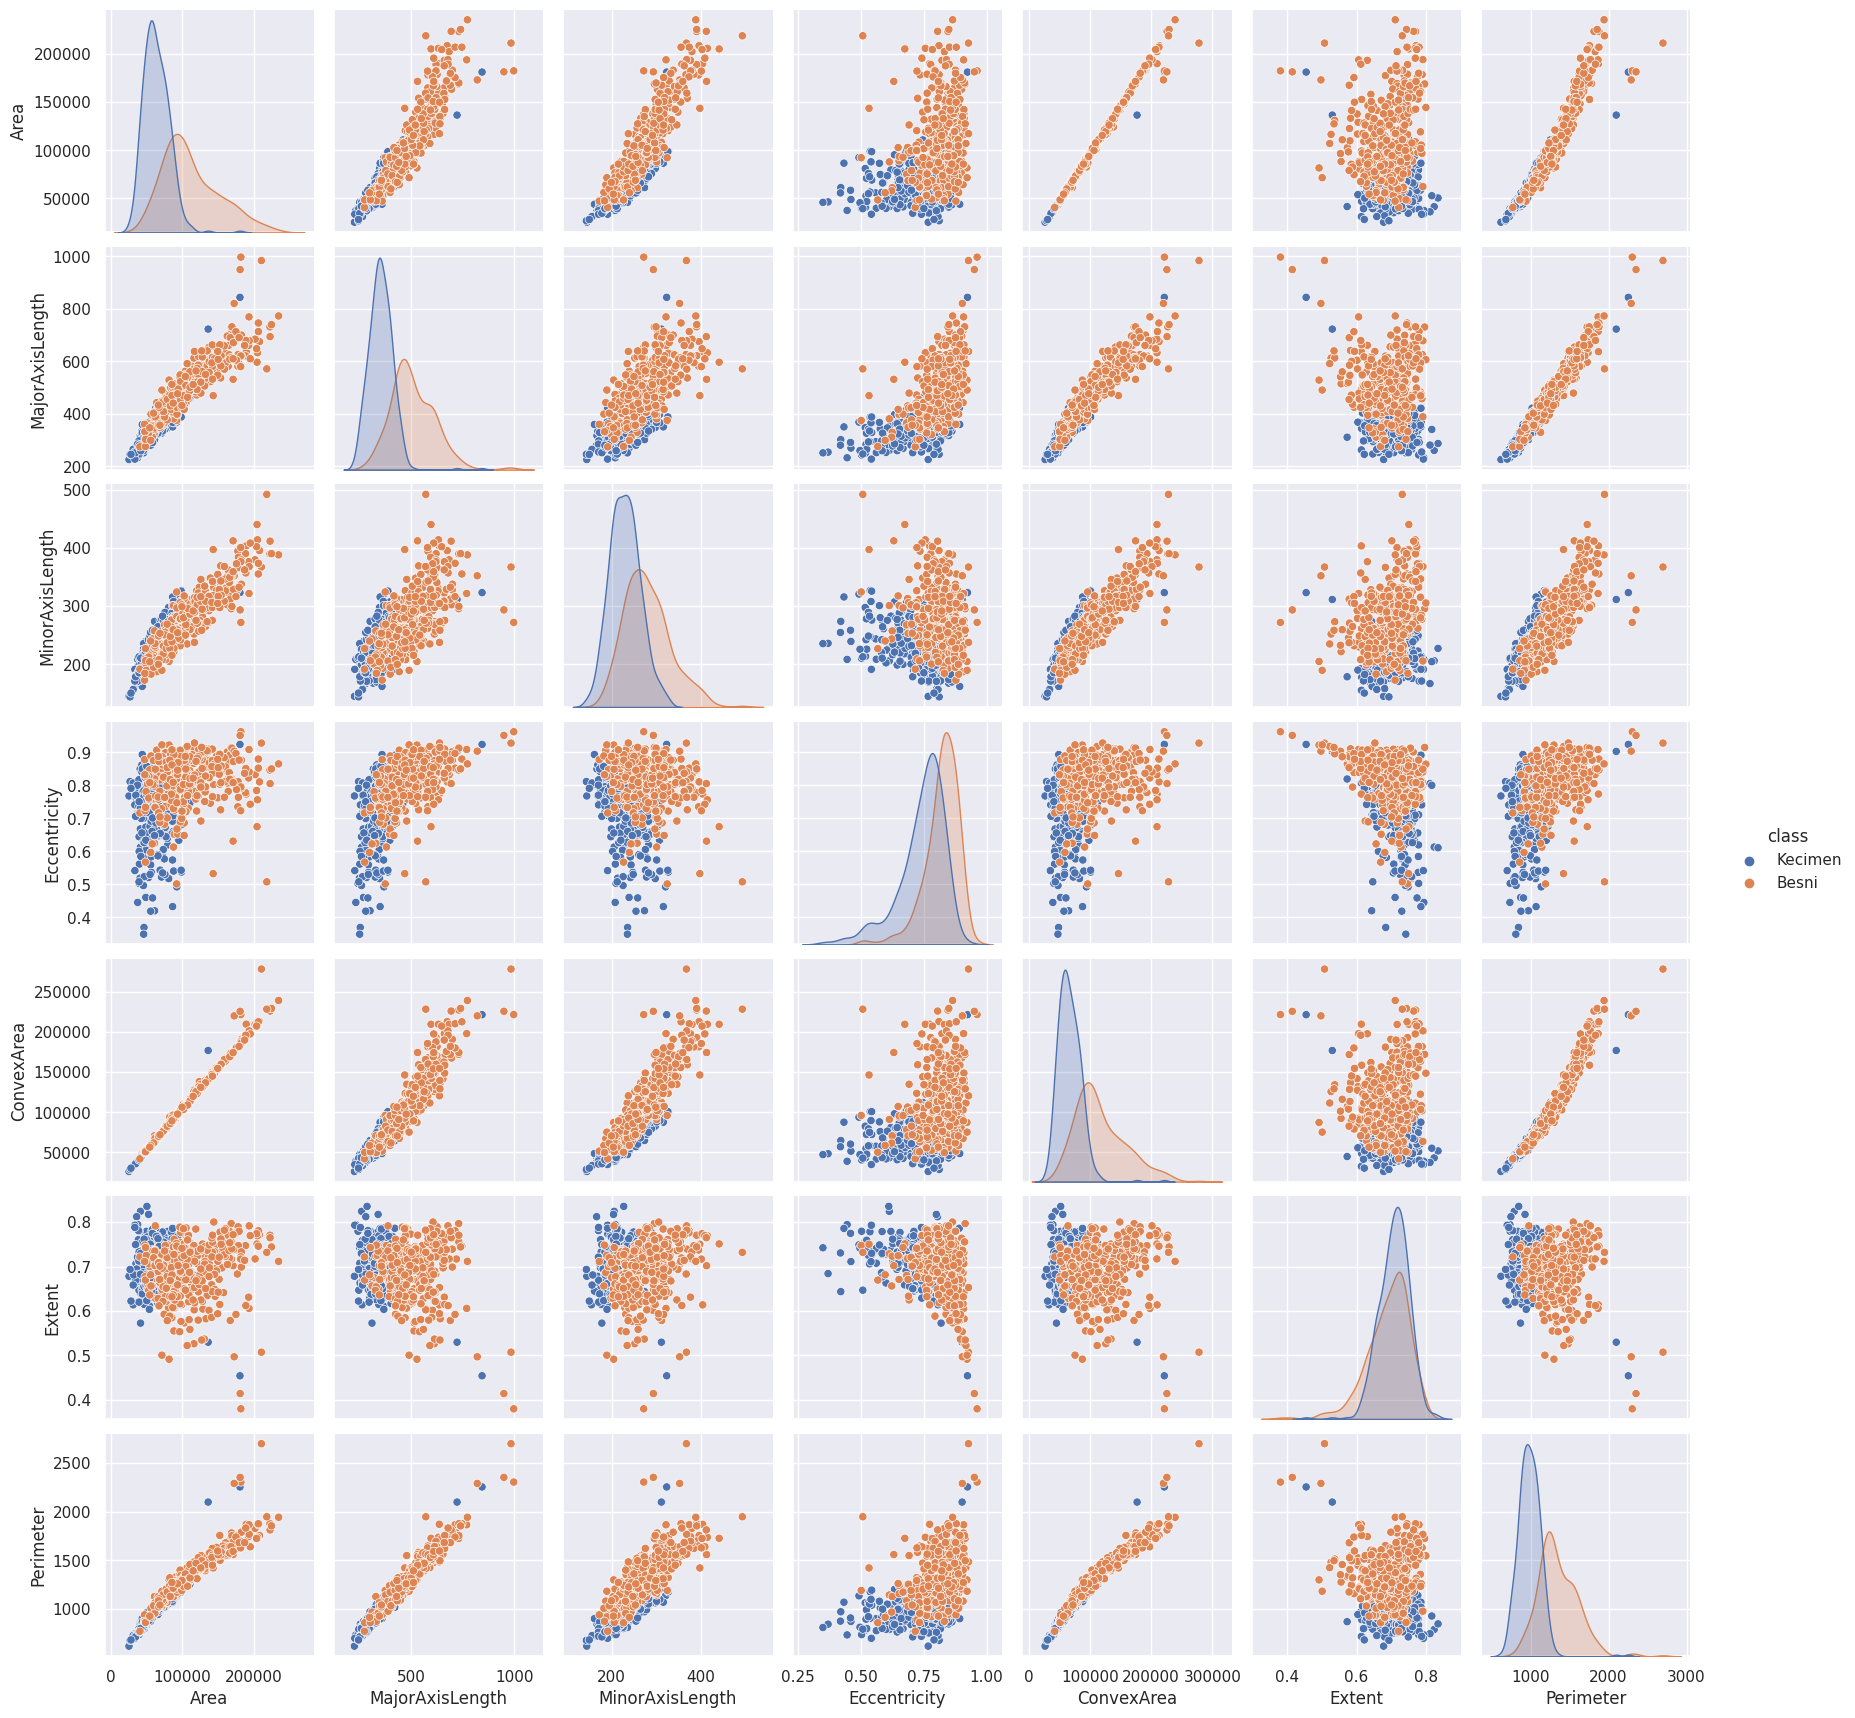

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

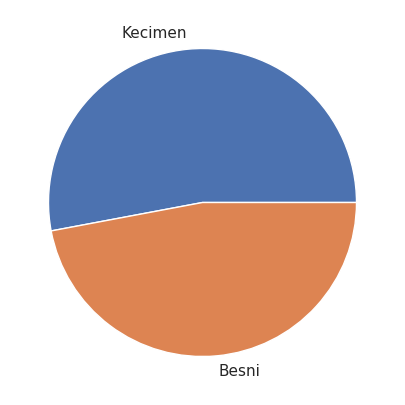

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  69726       354.176912       252.529208      0.701161       71849   
1  57346       330.478438       222.443748      0.739555       59365   
2  82028       397.114976       268.333773      0.737169       84427   
3  61251       301.507790       273.659941      0.419754       64732   
4  96277       447.134523       275.216154      0.788128       97865   
5  75620       368.224284       263.459255      0.698627       77493   
6  73167       340.055218       276.015177      0.584106       74545   
7  60847       336.923870       231.465696      0.726660       62492   
8  81021       347.750058       297.640626      0.517135       82552   
9  59902       358.591915       222.902027      0.783332       63250   

     Extent  Perimeter  
0  0.734399   1035.501  
1  0.723609    928.272  
2  0.686375   1106.355  
3  0.643596    971.769  
4  0.704057   1181.921  
5  0.726277   1059.186  
6  0.778737   1010.474  
7  0.698588    964.603  
8  0.757560   1063.868  
9  0.744124    982.788

In [ ]:
X.describe().transpose()

count          mean           std           min  \
Area             812.0  86362.116995  38678.209394  25387.000000   
MajorAxisLength  812.0    425.919629    115.303587    225.629541   
MinorAxisLength  812.0    253.240851     49.704061    143.710872   
Eccentricity     812.0      0.778398      0.090816      0.348730   
ConvexArea       812.0  89707.214286  40530.741498  26139.000000   
Extent           812.0      0.700057      0.053328      0.379856   
Perimeter        812.0   1155.439714    273.479518    619.074000   

                          25%           50%            75%            max  
Area             58532.500000  77193.000000  102793.750000  235047.000000  
MajorAxisLength    343.481235    401.370222     483.546479     997.291941  
MinorAxisLength    218.450742    246.032735     277.512135     492.275279  
Eccentricity         0.737558      0.795967       0.839608       0.962124  
ConvexArea       60462.250000  80211.500000  106596.250000  278217.000000  
Extent               0.671283      0.707739       0.735631       0.835455  
Perimeter          953.089500   1103.194500    1290.113750    2697.753000

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.430381        -0.622591        -0.014326     -0.851002   -0.440881   
1 -0.750655        -0.828248        -0.619991     -0.427975   -0.749084   
2 -0.112125        -0.249970         0.303843     -0.454260   -0.130357   
3 -0.649632        -1.079659         0.411067     -3.951552   -0.616584   
4  0.256501         0.184105         0.442395      0.107207    0.201398   
5 -0.277902        -0.500686         0.205712     -0.878918   -0.301543   
6 -0.341361        -0.745140         0.458481     -2.140717   -0.374322   
7 -0.660083        -0.772314        -0.438366     -0.570050   -0.671885   
8 -0.138176        -0.678364         0.893833     -2.878604   -0.176647   
9 -0.684531        -0.584277        -0.610765      0.054360   -0.653171   

     Extent  Perimeter  
0  0.644374  -0.438836  
1  0.441922  -0.831169  
2 -0.256711  -0.179593  
3 -1.059401  -0.672021  
4  0.075065   0.096891  
5  0.491993  -0.352176  
6  1.476314  -0.530406  
7 -0.027558  -0.698240  
8  1.078956  -0.335046  
9  0.826862  -0.631704

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             812.0 -2.450147e-16  1.000616 -1.577444 -0.719960 -0.237208   
MajorAxisLength  812.0 -5.600337e-16  1.000616 -1.738138 -0.715409 -0.213042   
MinorAxisLength  812.0 -3.500211e-17  1.000616 -2.205001 -0.700376 -0.145110   
Eccentricity     812.0  1.050063e-16  1.000616 -4.734097 -0.449982  0.193576   
ConvexArea       812.0 -1.050063e-16  1.000616 -1.569362 -0.721995 -0.234429   
Extent           812.0  1.837611e-16  1.000616 -6.008064 -0.539897  0.144148   
Perimeter        812.0 -5.950358e-16  1.000616 -1.962473 -0.740366 -0.191157   

                      75%       max  
Area             0.425091  3.846520  
MajorAxisLength  0.500092  4.958427  
MinorAxisLength  0.488617  4.812117  
Eccentricity     0.674412  2.024299  
ConvexArea       0.416954  4.653899  
Extent           0.667495  2.540533  
Perimeter        0.492750  5.643069

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

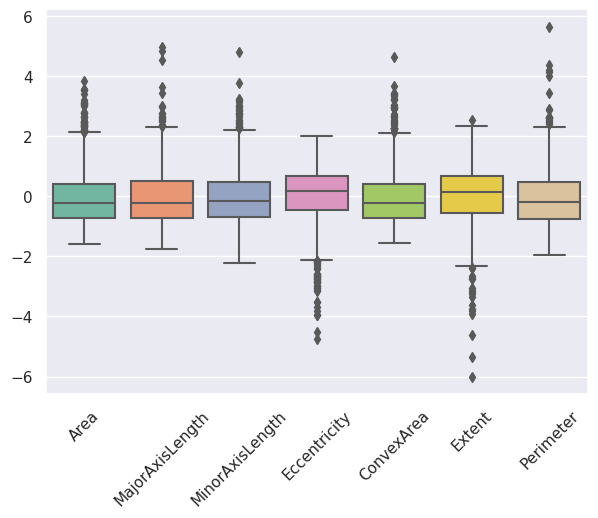

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


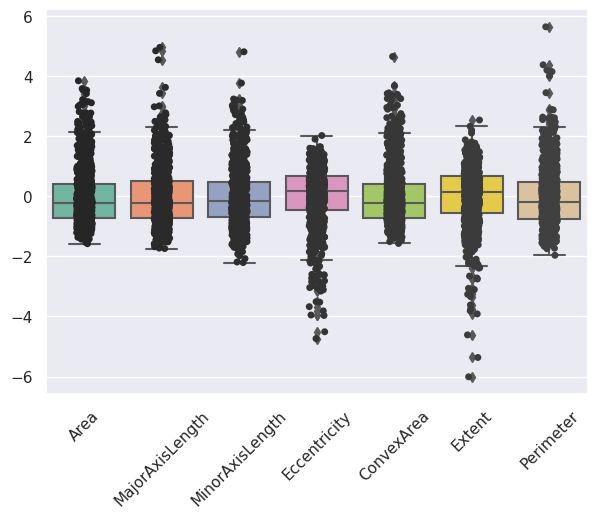

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

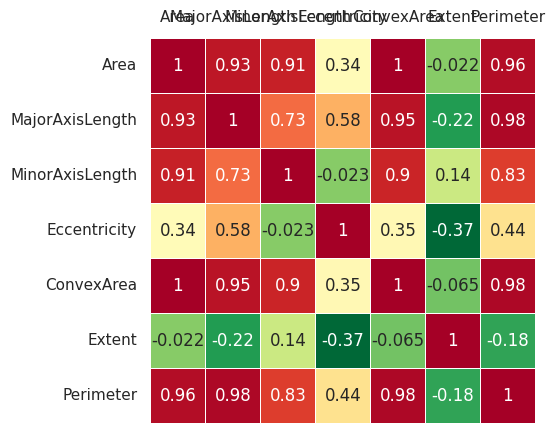

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

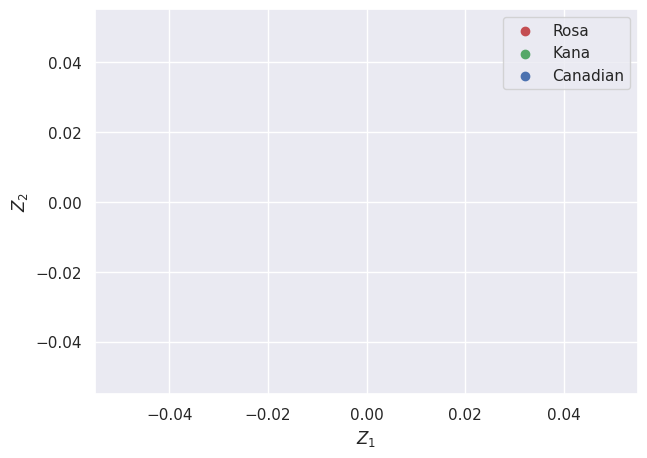

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[ 0.44784944 -0.11785987  0.00196691 -0.11428459 -0.616457   -0.09687584
  -0.61892725]
 [ 0.44324889  0.13478823 -0.09617696  0.49627978  0.08332334 -0.68636191
   0.22755982]
 [ 0.38967921 -0.37592363  0.22547038 -0.65941997  0.38181307 -0.24001491
   0.13331009]
 [ 0.20297678  0.60846601 -0.63704239 -0.41653029  0.07574538  0.05509403
   0.02182527]
 [ 0.45064938 -0.08836428  0.0363344   0.06197845 -0.38348541  0.47857668
   0.63863032]
 [-0.06186146 -0.66899435 -0.72830797  0.11984264  0.05714926  0.02351801
  -0.00241402]
 [ 0.45055537  0.03209422  0.04830678  0.3378012   0.55784614  0.47884356
  -0.37288492]]


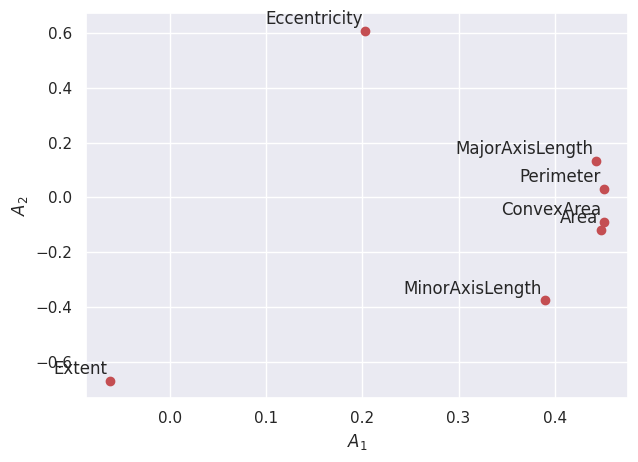

In [ ]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


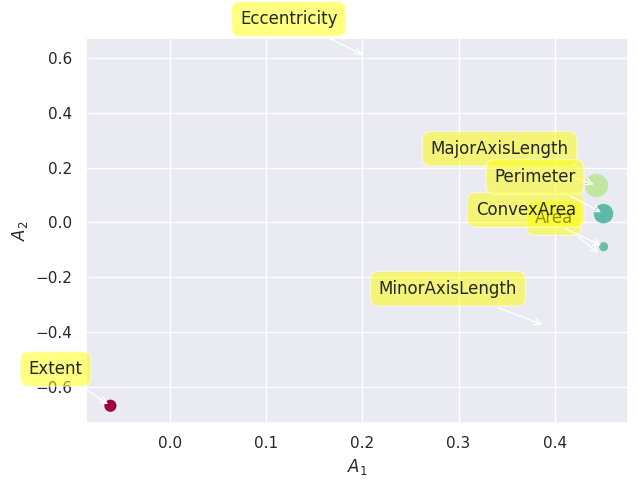

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.84326710e+00 1.45504762e+00 6.23247185e-01 5.71367704e-02
 2.20836429e-02 6.78743172e-03 1.06157169e-03]


Text(0, 0.5, 'Explained variance')

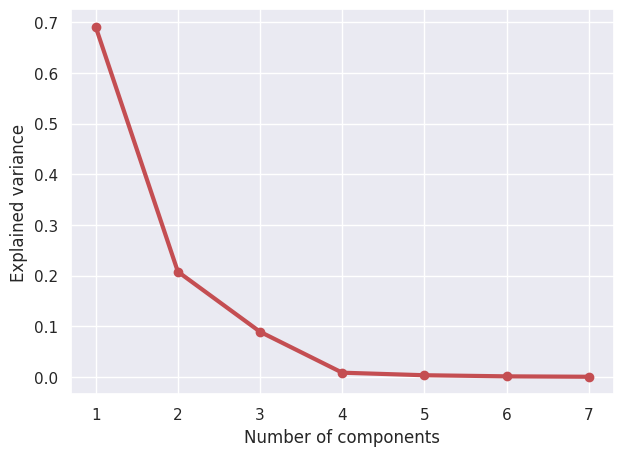

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print (Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

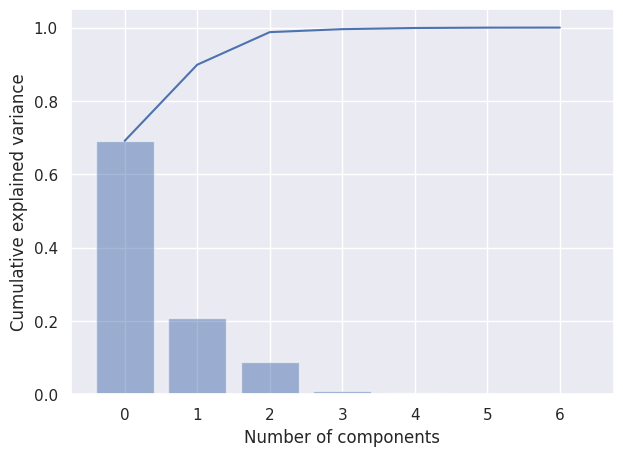

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

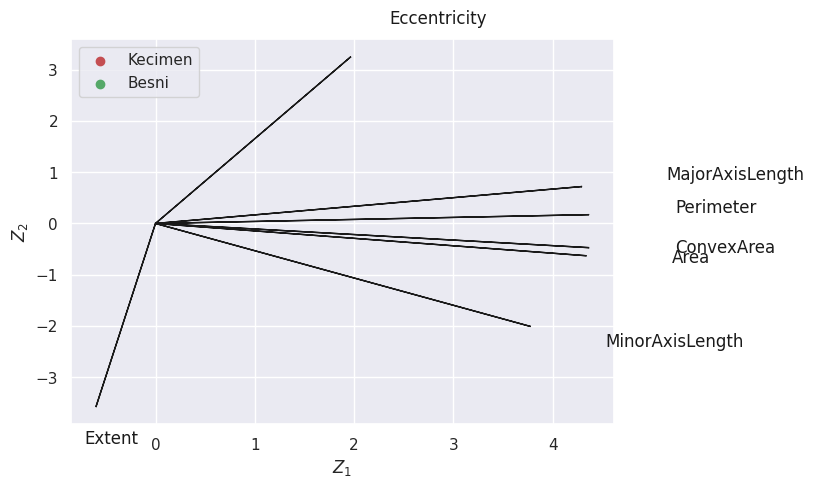

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Besni')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0   -1.083289 -0.951822  0.091406
1   -1.771167 -0.306632 -0.178193
2   -0.258598 -0.233608  0.555264
3   -1.926494 -1.886225  3.429254
4    0.520402 -0.171396 -0.028423
..        ...       ...       ...
807 -0.025765  0.713575  0.118169
808  0.367535  0.973592  0.683293
809  0.770207 -1.294225  0.079157
810  0.741129  0.994200  0.079035
811  0.580088  2.123839 -0.199313

[812 rows x 3 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.57%] of the variance'}, xlabel='PC1 (69.1% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

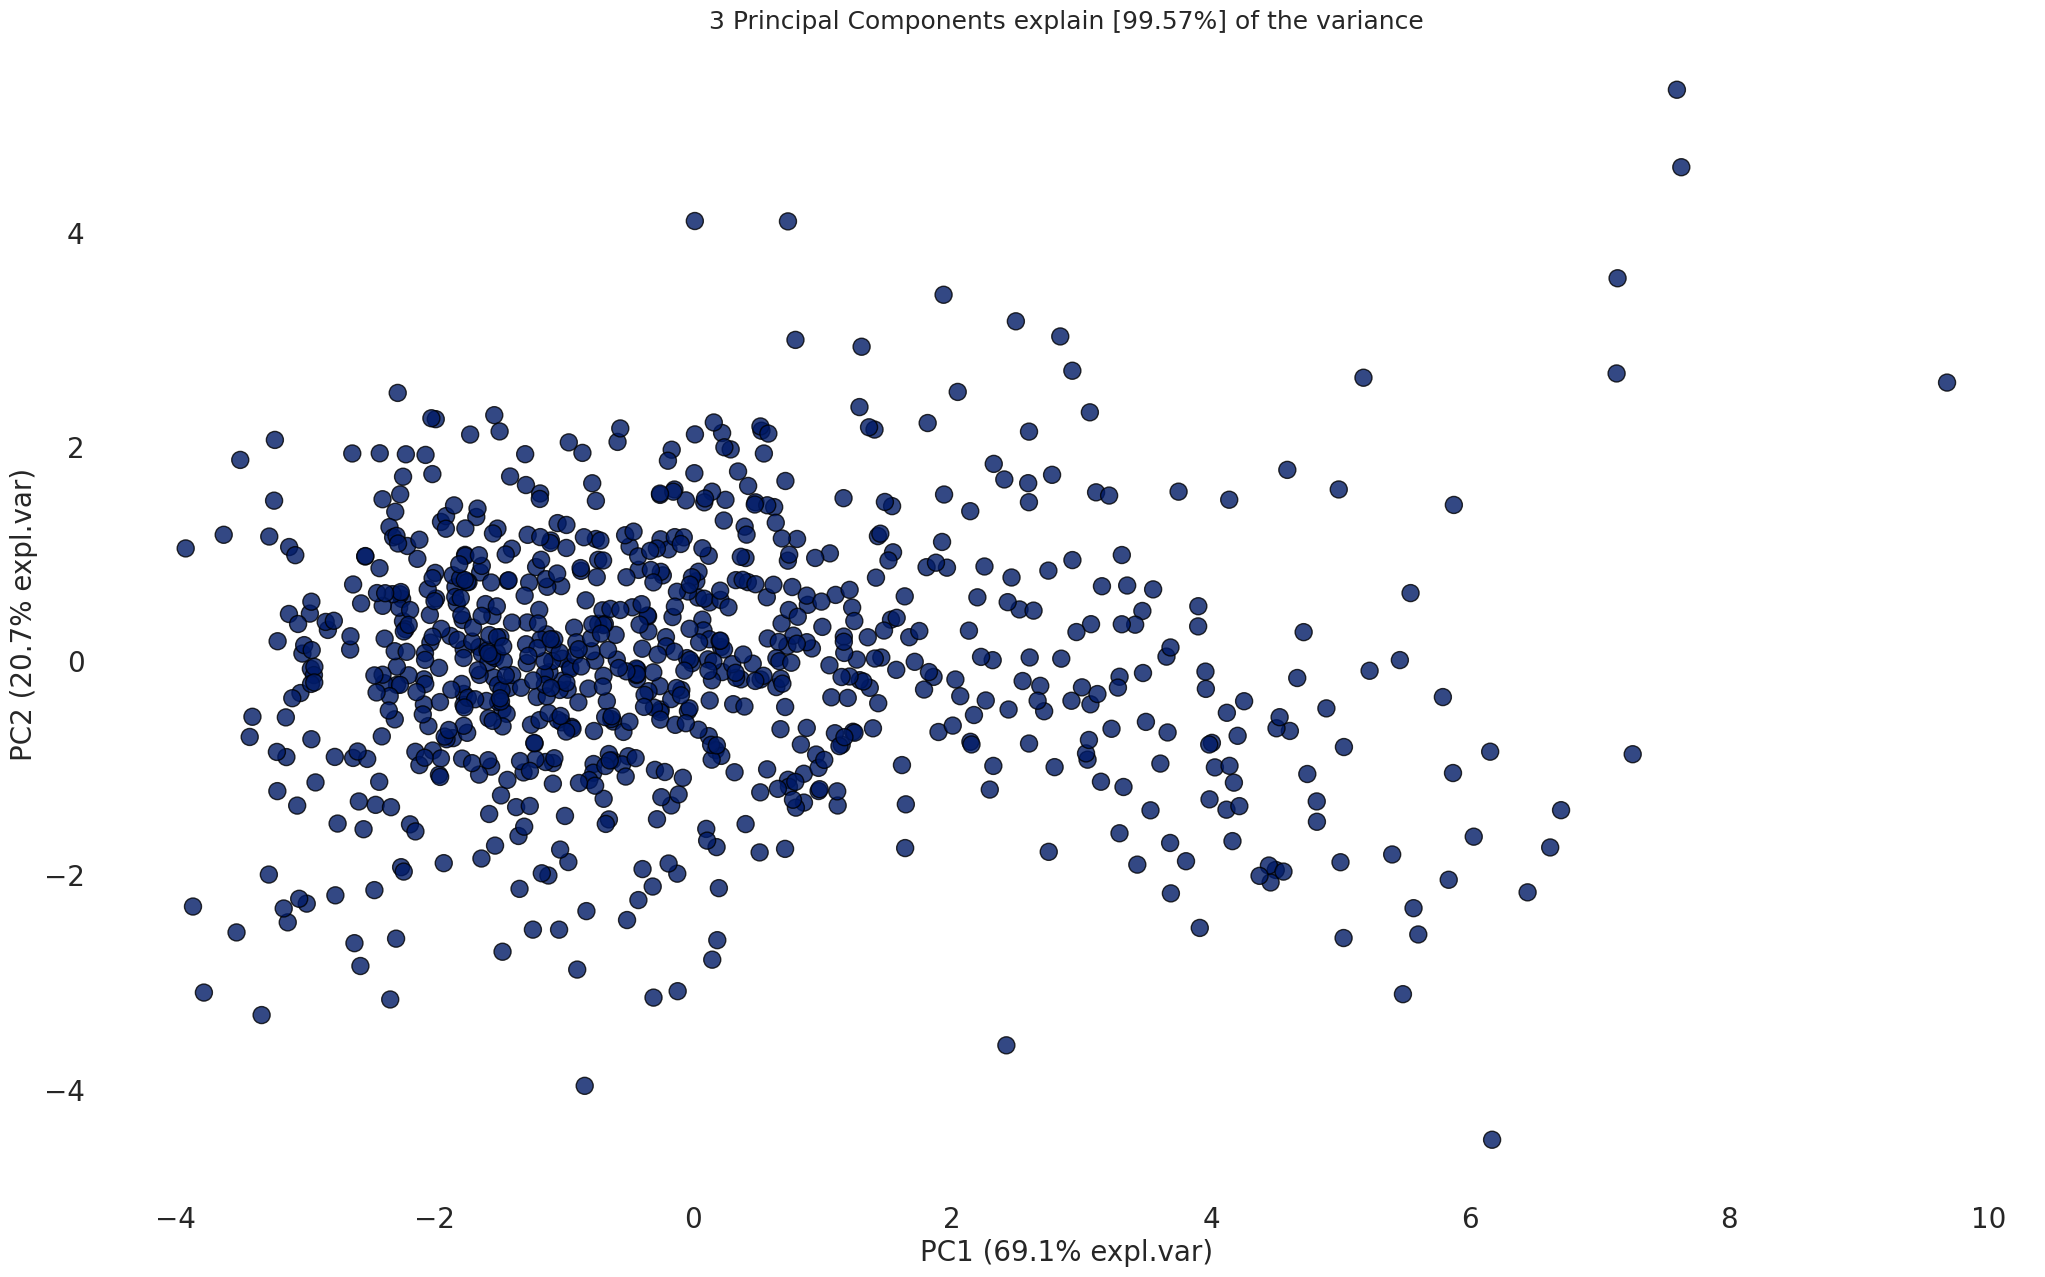

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

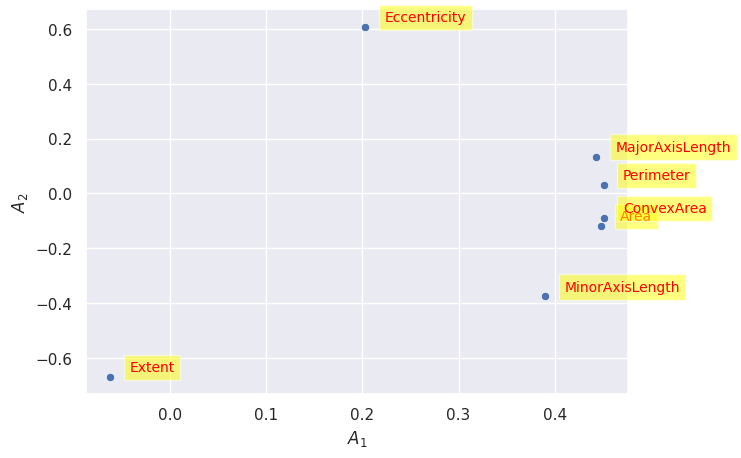

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

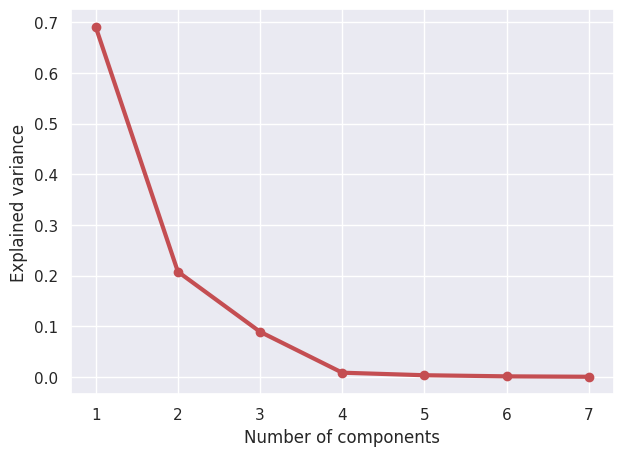

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

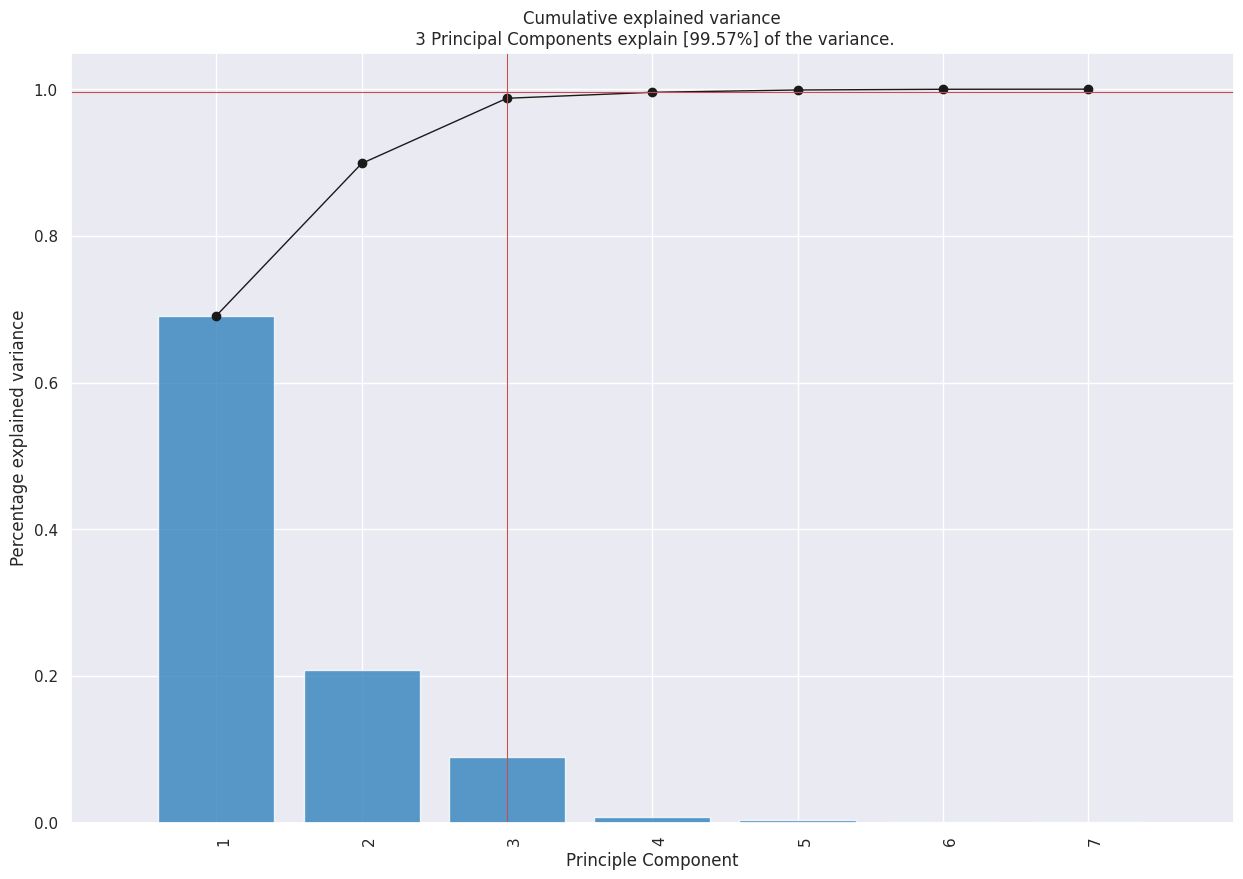

<Figure size 700x500 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


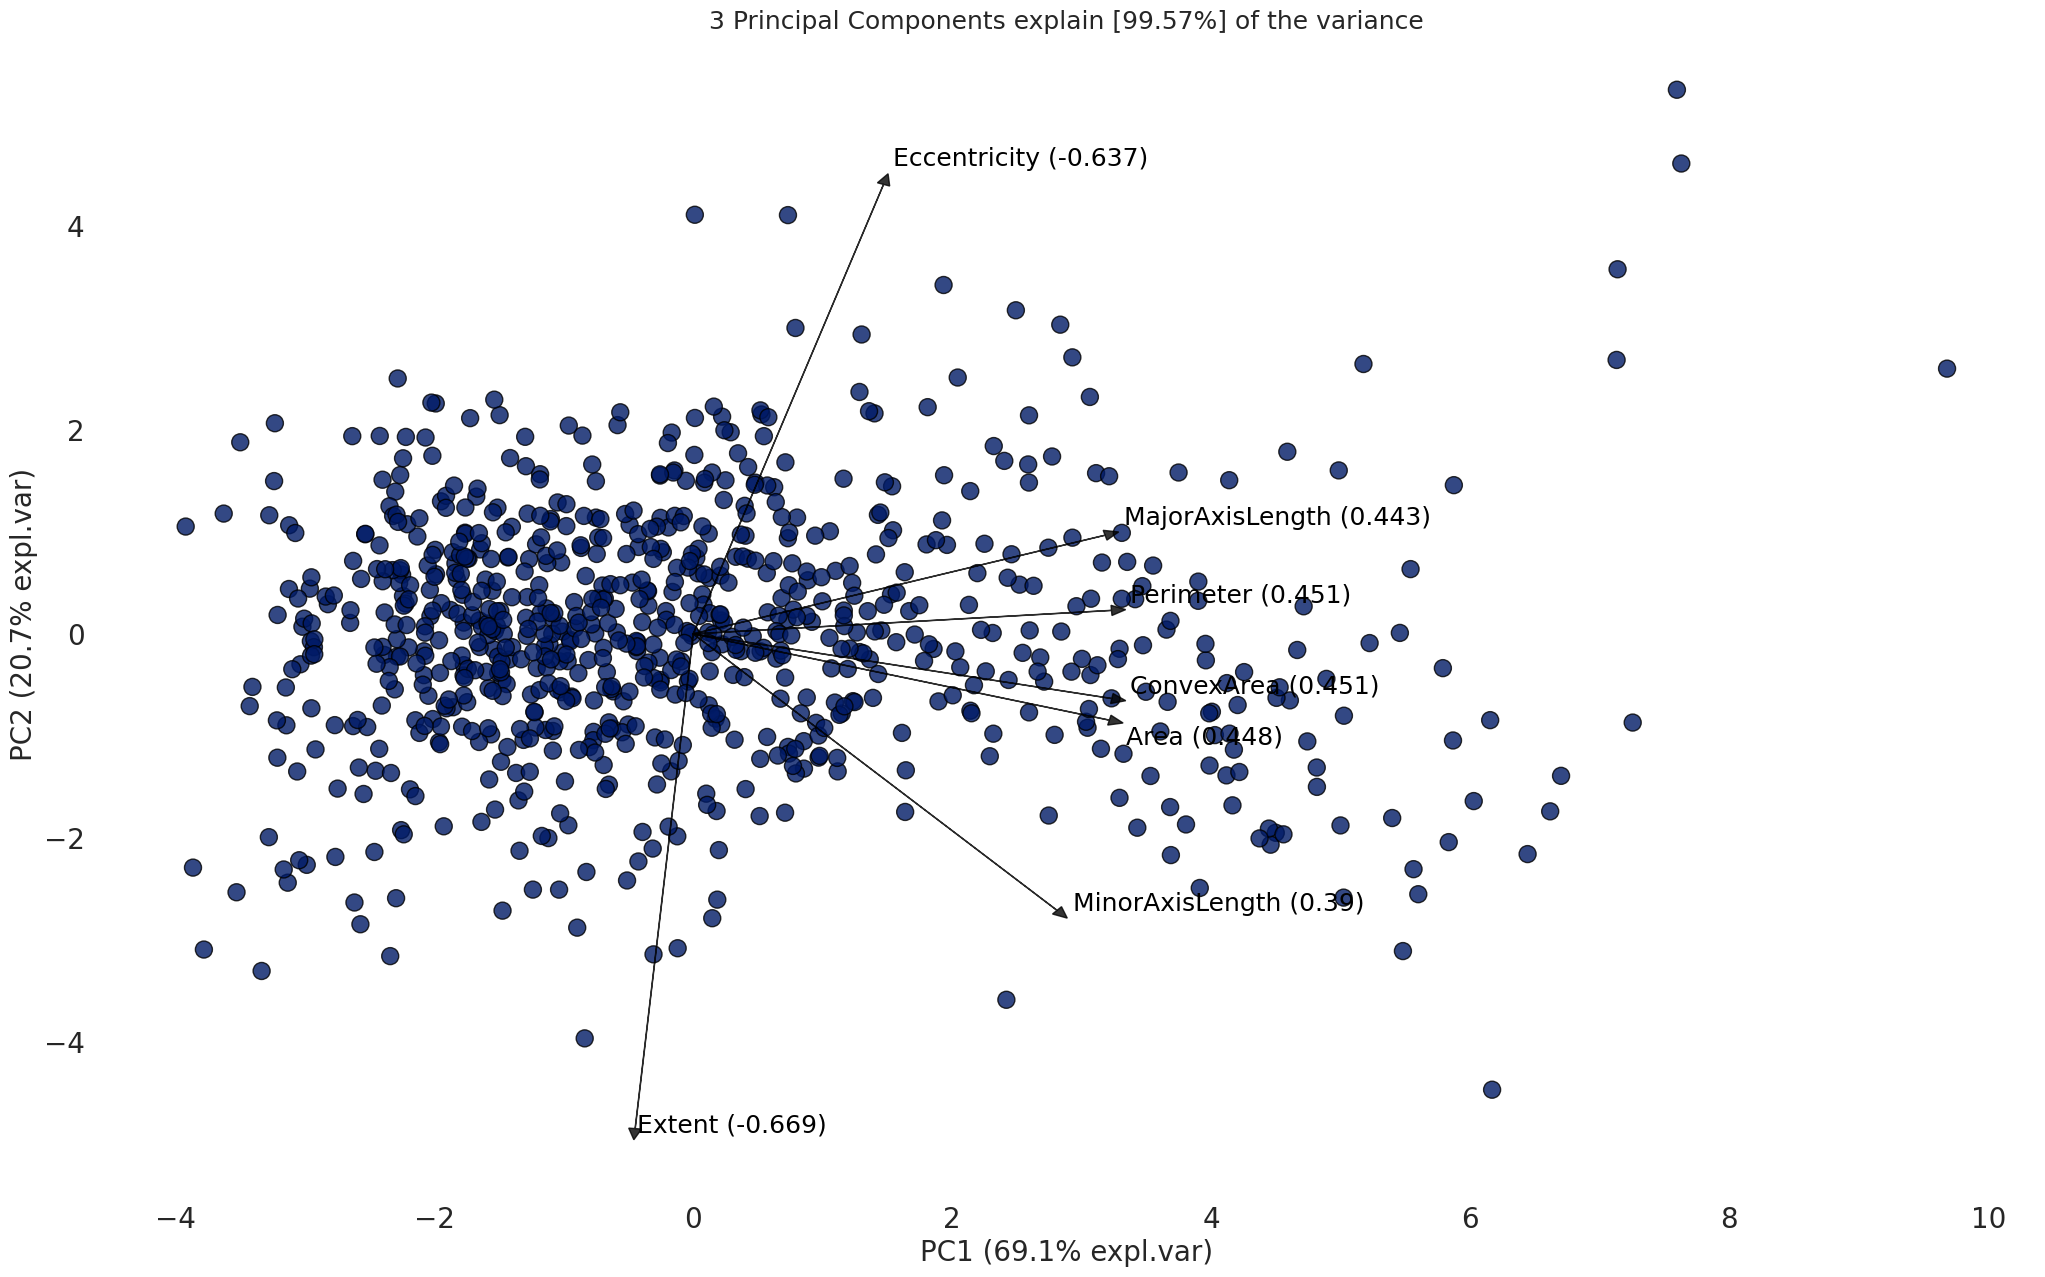

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.57%] of the variance'}, xlabel='PC1 (69.1% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

In [ ]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (731, 8)
Unseen Data For Predictions: (81, 8)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description                 Value
0                               session_id                   123
1                                   Target                 class
2                              Target Type                Binary
3                            Label Encoded  Besni: 0, Kecimen: 1
4                            Original Data              (731, 8)
5                           Missing Values                 False
6                         Numeric Features                     7
7                     Categorical Features                     0
8                         Ordinal Features                 False
9                High Cardinality Features                 False
10                 High Cardinality Method                  None
11                   Transformed Train Set              (511, 6)
12                    Transformed Test Set              (220, 6)
13                      Shuffle Train-Test                  True
14                     Stratify Train-Test                 False
15                          Fold Generator       StratifiedKFold
16                             Fold Number                    10
17                                CPU Jobs                    -1
18                                 Use GPU                 False
19                          Log Experiment                 False
20                         Experiment Name      clf-default-name
21                                     USI                  3b6d
22                         Imputation Type                simple
23          Iterative Imputation Iteration                  None
24                         Numeric Imputer                  mean
25      Iterative Imputation Numeric Model                  None
26                     Categorical Imputer              constant
27  Iterative Imputation Categorical Model                  None
28           Unknown Categoricals Handling        least_frequent
29                               Normalize                 False
30                        Normalize Method                  None
31                          Transformation                 False
32                   Transformation Method                  None
33                                     PCA                 False
34                              PCA Method                  None
35                          PCA Components                  None
36                     Ignore Low Variance                 False
37                     Combine Rare Levels                 False
38                    Rare Level Threshold                  None
39                         Numeric Binning                 False
40                         Remove Outliers                 False
41                      Outliers Threshold                  None
42                Remove Multicollinearity                 False
43             Multicollinearity Threshold                  None
44             Remove Perfect Collinearity                  True
45                              Clustering                 False
46                    Clustering Iteration                  None
47                     Polynomial Features                 False
48                       Polynomial Degree                  None
49                    Trignometry Features                 False
50                    Polynomial Threshold                  None
51                          Group Features                 False
52                       Feature Selection                 False
53                Feature Selection Method               classic
54            Features Selection Threshold                  None
55                     Feature Interaction                 False
56                           Feature Ratio                 False
57                   Interaction Threshold                  None
58                           Fix Imbalance                 False
59                    Fix Imbalance Method                 SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.8709  0.0000  0.9182  0.8389   
lda          Linear Discriminant Analysis    0.8690  0.9203  0.8948  0.8501   
lr                    Logistic Regression    0.8670  0.9260  0.8985  0.8457   
xgboost         Extreme Gradient Boosting    0.8630  0.9291  0.8902  0.8438   
rf               Random Forest Classifier    0.8571  0.9239  0.8945  0.8333   
ada                  Ada Boost Classifier    0.8494  0.9107  0.8826  0.8306   
et                 Extra Trees Classifier    0.8474  0.9258  0.8791  0.8281   
lightgbm  Light Gradient Boosting Machine    0.8473  0.9316  0.8786  0.8272   
gbc          Gradient Boosting Classifier    0.8376  0.9253  0.8632  0.8220   
dt               Decision Tree Classifier    0.8297  0.8298  0.8277  0.8344   
qda       Quadratic Discriminant Analysis    0.8297  0.9193  0.9374  0.7747   
nb                            Naive Bayes    0.8160  0.9065  0.9222  0.7628   
knn                K Neighbors Classifier    0.7965  0.8337  0.8317  0.7782   
svm                   SVM - Linear Kernel    0.5422  0.0000  0.2055  0.3112   
dummy                    Dummy Classifier    0.5010  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.8759  0.7419  0.7471     0.029  
lda       0.8707  0.7381  0.7414     0.018  
lr        0.8698  0.7341  0.7384     0.507  
xgboost   0.8656  0.7257  0.7284     0.072  
rf        0.8619  0.7143  0.7182     0.458  
ada       0.8539  0.6988  0.7039     0.150  
et        0.8515  0.6950  0.6985     0.181  
lightgbm  0.8516  0.6946  0.6971     0.157  
gbc       0.8411  0.6752  0.6778     0.174  
dt        0.8296  0.6594  0.6617     0.031  
qda       0.8466  0.6592  0.6786     0.013  
nb        0.8338  0.6325  0.6494     0.018  
knn       0.8017  0.5934  0.5988     0.027  
svm       0.2136  0.0856  0.1088     0.026  
dummy     0.0000  0.0000  0.0000     0.013

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Logistic Regression**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9138  0.8621  0.8333  0.8475  0.6839  0.6843
1       0.8596  0.9421  0.8621  0.8621  0.8621  0.7192  0.7192
2       0.9123  0.9594  0.8966  0.9286  0.9123  0.8246  0.8251
3       0.8772  0.9335  0.9310  0.8438  0.8852  0.7539  0.7581
4       0.8421  0.8990  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.9298  0.9852  0.8966  0.9630  0.9286  0.8598  0.8619
6       0.7544  0.8695  0.8276  0.7273  0.7742  0.5074  0.5125
7       0.8772  0.9298  0.8621  0.8929  0.8772  0.7545  0.7549
8       0.9286  0.9655  0.9310  0.9310  0.9310  0.8570  0.8570
9       0.8571  0.8940  0.9310  0.8182  0.8710  0.7125  0.7199
Mean    0.8680  0.9292  0.8862  0.8633  0.8736  0.7357  0.7377
SD      0.0490  0.0339  0.0347  0.0651  0.0440  0.0985  0.0975

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'lr'. 
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9163  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8596  0.9470  0.8621  0.8621  0.8621  0.7192  0.7192
2       0.8947  0.9594  0.8966  0.8966  0.8966  0.7894  0.7894
3       0.9123  0.9298  1.0000  0.8529  0.9206  0.8240  0.8370
4       0.8421  0.9039  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.9298  0.9877  0.8966  0.9630  0.9286  0.8598  0.8619
6       0.7544  0.8707  0.8621  0.7143  0.7813  0.5068  0.5185
7       0.8947  0.9286  0.8966  0.8966  0.8966  0.7894  0.7894
8       0.9464  0.9681  0.9655  0.9333  0.9492  0.8926  0.8932
9       0.8571  0.8914  0.9310  0.8182  0.8710  0.7125  0.7199
Mean    0.8751  0.9303  0.9069  0.8609  0.8820  0.7496  0.7534
SD      0.0517  0.0344  0.0438  0.0655  0.0455  0.1038  0.1021

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_lr'. 
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression Model**

In [ ]:
#Update statmodels
#!pip3 install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Ridge Classifier Model**

In [ ]:
ridge = create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8421  0.0  0.8966  0.8125  0.8525  0.6835  0.6874
2       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8947  0.0  1.0000  0.8286  0.9062  0.7886  0.8069
4       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.0  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7544  0.0  0.8966  0.7027  0.7879  0.5062  0.5276
7       0.8772  0.0  0.9655  0.8235  0.8889  0.7536  0.7655
8       0.9286  0.0  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.0  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.0  0.9310  0.8288  0.8759  0.7281  0.7364
SD      0.0436  0.0  0.0378  0.0525  0.0366  0.0877  0.0840

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


**Tune Ridge Model**

In [ ]:
tuned_ridge = tune_model(ridge)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8772  0.0  0.8966  0.8667  0.8814  0.7542  0.7546
2       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8772  0.0  0.9655  0.8235  0.8889  0.7536  0.7655
4       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.0  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7368  0.0  0.8621  0.6944  0.7692  0.4712  0.4863
7       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
8       0.9286  0.0  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.0  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.0  0.9207  0.8349  0.8748  0.7282  0.7341
SD      0.0470  0.0  0.0347  0.0554  0.0395  0.0945  0.0911

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Ridge Model**

In [ ]:
evaluate_model(tuned_ridge)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Linear Discriminant Analysis Model**

In [ ]:
lda = create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9089  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8421  0.9458  0.8966  0.8125  0.8525  0.6835  0.6874
2       0.8596  0.9594  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8947  0.9335  1.0000  0.8286  0.9062  0.7886  0.8069
4       0.8772  0.8966  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.9852  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7544  0.8658  0.8966  0.7027  0.7879  0.5062  0.5276
7       0.8772  0.9236  0.9655  0.8235  0.8889  0.7536  0.7655
8       0.9286  0.9604  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.8991  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.9278  0.9310  0.8288  0.8759  0.7281  0.7364
SD      0.0436  0.0343  0.0378  0.0525  0.0366  0.0877  0.0840

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Linear Discriminant Analysis Model**

In [ ]:
tuned_lda = tune_model(lda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9101  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8596  0.9446  0.8966  0.8387  0.8667  0.7189  0.7206
2       0.8596  0.9606  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8947  0.9335  1.0000  0.8286  0.9062  0.7886  0.8069
4       0.8772  0.9002  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.9852  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7544  0.8670  0.8966  0.7027  0.7879  0.5062  0.5276
7       0.8772  0.9249  0.9655  0.8235  0.8889  0.7536  0.7655
8       0.9286  0.9655  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.8991  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8663  0.9291  0.9310  0.8314  0.8773  0.7317  0.7397
SD      0.0430  0.0342  0.0378  0.0523  0.0359  0.0865  0.0827

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Linear Discriminant Analysis Model**

In [ ]:
tuned_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_lda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description                 Value
0                               session_id                   123
1                                   Target                 class
2                              Target Type                Binary
3                            Label Encoded  Besni: 0, Kecimen: 1
4                            Original Data              (812, 8)
5                           Missing Values                 False
6                         Numeric Features                     7
7                     Categorical Features                     0
8                         Ordinal Features                 False
9                High Cardinality Features                 False
10                 High Cardinality Method                  None
11                   Transformed Train Set              (568, 3)
12                    Transformed Test Set              (244, 3)
13                      Shuffle Train-Test                  True
14                     Stratify Train-Test                 False
15                          Fold Generator       StratifiedKFold
16                             Fold Number                    10
17                                CPU Jobs                    -1
18                                 Use GPU                 False
19                          Log Experiment                 False
20                         Experiment Name      clf-default-name
21                                     USI                  ff79
22                         Imputation Type                simple
23          Iterative Imputation Iteration                  None
24                         Numeric Imputer                  mean
25      Iterative Imputation Numeric Model                  None
26                     Categorical Imputer              constant
27  Iterative Imputation Categorical Model                  None
28           Unknown Categoricals Handling        least_frequent
29                               Normalize                  True
30                        Normalize Method                zscore
31                          Transformation                 False
32                   Transformation Method                  None
33                                     PCA                  True
34                              PCA Method                linear
35                          PCA Components                     3
36                     Ignore Low Variance                 False
37                     Combine Rare Levels                 False
38                    Rare Level Threshold                  None
39                         Numeric Binning                 False
40                         Remove Outliers                 False
41                      Outliers Threshold                  None
42                Remove Multicollinearity                 False
43             Multicollinearity Threshold                  None
44             Remove Perfect Collinearity                  True
45                              Clustering                 False
46                    Clustering Iteration                  None
47                     Polynomial Features                 False
48                       Polynomial Degree                  None
49                    Trignometry Features                 False
50                    Polynomial Threshold                  None
51                          Group Features                 False
52                       Feature Selection                 False
53                Feature Selection Method               classic
54            Features Selection Threshold                  None
55                     Feature Interaction                 False
56                           Feature Ratio                 False
57                   Interaction Threshold                  None
58                           Fix Imbalance                 False
59                    Fix Imbalance Method                 SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9163  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8596  0.9470  0.8621  0.8621  0.8621  0.7192  0.7192
2       0.8947  0.9594  0.8966  0.8966  0.8966  0.7894  0.7894
3       0.9123  0.9298  1.0000  0.8529  0.9206  0.8240  0.8370
4       0.8421  0.9039  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.9298  0.9877  0.8966  0.9630  0.9286  0.8598  0.8619
6       0.7544  0.8707  0.8621  0.7143  0.7813  0.5068  0.5185
7       0.8947  0.9286  0.8966  0.8966  0.8966  0.7894  0.7894
8       0.9464  0.9681  0.9655  0.9333  0.9492  0.8926  0.8932
9       0.8571  0.8914  0.9310  0.8182  0.8710  0.7125  0.7199
Mean    0.8751  0.9303  0.9069  0.8609  0.8820  0.7496  0.7534
SD      0.0517  0.0344  0.0438  0.0655  0.0455  0.1038  0.1021

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

Create Linear Regression Model

In [ ]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9138  0.8621  0.8333  0.8475  0.6839  0.6843
1       0.8596  0.9421  0.8621  0.8621  0.8621  0.7192  0.7192
2       0.9123  0.9594  0.8966  0.9286  0.9123  0.8246  0.8251
3       0.8772  0.9335  0.9310  0.8438  0.8852  0.7539  0.7581
4       0.8421  0.8990  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.9298  0.9852  0.8966  0.9630  0.9286  0.8598  0.8619
6       0.7544  0.8695  0.8276  0.7273  0.7742  0.5074  0.5125
7       0.8772  0.9298  0.8621  0.8929  0.8772  0.7545  0.7549
8       0.9286  0.9655  0.9310  0.9310  0.9310  0.8570  0.8570
9       0.8571  0.8940  0.9310  0.8182  0.8710  0.7125  0.7199
Mean    0.8680  0.9292  0.8862  0.8633  0.8736  0.7357  0.7377
SD      0.0490  0.0339  0.0347  0.0651  0.0440  0.0985  0.0975

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Tune lr Model

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9163  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8596  0.9470  0.8621  0.8621  0.8621  0.7192  0.7192
2       0.8947  0.9594  0.8966  0.8966  0.8966  0.7894  0.7894
3       0.9123  0.9298  1.0000  0.8529  0.9206  0.8240  0.8370
4       0.8421  0.9039  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.9298  0.9877  0.8966  0.9630  0.9286  0.8598  0.8619
6       0.7544  0.8707  0.8621  0.7143  0.7813  0.5068  0.5185
7       0.8947  0.9286  0.8966  0.8966  0.8966  0.7894  0.7894
8       0.9464  0.9681  0.9655  0.9333  0.9492  0.8926  0.8932
9       0.8571  0.8914  0.9310  0.8182  0.8710  0.7125  0.7199
Mean    0.8751  0.9303  0.9069  0.8609  0.8820  0.7496  0.7534
SD      0.0517  0.0344  0.0438  0.0655  0.0455  0.1038  0.1021

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


Evaluate lr Model

In [ ]:
evaluate_lr_pca = evaluate_model(lr_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Create Ridge Model

In [ ]:
ridge_pca = create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8421  0.0  0.8966  0.8125  0.8525  0.6835  0.6874
2       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8947  0.0  1.0000  0.8286  0.9062  0.7886  0.8069
4       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.0  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7544  0.0  0.8966  0.7027  0.7879  0.5062  0.5276
7       0.8772  0.0  0.9655  0.8235  0.8889  0.7536  0.7655
8       0.9286  0.0  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.0  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.0  0.9310  0.8288  0.8759  0.7281  0.7364
SD      0.0436  0.0  0.0378  0.0525  0.0366  0.0877  0.0840

INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


Tune Ridge Model

In [ ]:
tuned_ridge_pca = tune_model(ridge_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8772  0.0  0.8966  0.8667  0.8814  0.7542  0.7546
2       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8772  0.0  0.9655  0.8235  0.8889  0.7536  0.7655
4       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.0  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7368  0.0  0.8621  0.6944  0.7692  0.4712  0.4863
7       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
8       0.9286  0.0  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.0  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.0  0.9207  0.8349  0.8748  0.7282  0.7341
SD      0.0470  0.0  0.0347  0.0554  0.0395  0.0945  0.0911

INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


Evaluate Ridge Model

In [ ]:
evaluate_ridge_pca = evaluate_model(ridge_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Create Linear Discriminant Analysis Model

In [ ]:
lda_pca = create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9089  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8421  0.9458  0.8966  0.8125  0.8525  0.6835  0.6874
2       0.8596  0.9594  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8947  0.9335  1.0000  0.8286  0.9062  0.7886  0.8069
4       0.8772  0.8966  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.9852  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7544  0.8658  0.8966  0.7027  0.7879  0.5062  0.5276
7       0.8772  0.9236  0.9655  0.8235  0.8889  0.7536  0.7655
8       0.9286  0.9604  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.8991  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.9278  0.9310  0.8288  0.8759  0.7281  0.7364
SD      0.0436  0.0343  0.0378  0.0525  0.0366  0.0877  0.0840

INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 7
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


Tune lda Model

In [ ]:
tuned_ridge_pca = tune_model(ridge_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8772  0.0  0.8966  0.8667  0.8814  0.7542  0.7546
2       0.8596  0.0  0.8966  0.8387  0.8667  0.7189  0.7206
3       0.8772  0.0  0.9655  0.8235  0.8889  0.7536  0.7655
4       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
5       0.8947  0.0  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7368  0.0  0.8621  0.6944  0.7692  0.4712  0.4863
7       0.8772  0.0  0.9310  0.8438  0.8852  0.7539  0.7581
8       0.9286  0.0  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8571  0.0  0.9655  0.8000  0.8750  0.7117  0.7290
Mean    0.8645  0.0  0.9207  0.8349  0.8748  0.7282  0.7341
SD      0.0470  0.0  0.0347  0.0554  0.0395  0.0945  0.0911

INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 8
INFO:logs:RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


Evaluate lda Model

In [ ]:
evaluate_lda_pca = evaluate_model(lda_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8680  0.9292  0.8862  0.8633   
ridge                    Ridge Classifier    0.8645  0.0000  0.9310  0.8288   
lda          Linear Discriminant Analysis    0.8645  0.9278  0.9310  0.8288   
svm                   SVM - Linear Kernel    0.8627  0.0000  0.8966  0.8484   
rf               Random Forest Classifier    0.8627  0.9087  0.9069  0.8421   
knn                K Neighbors Classifier    0.8575  0.9069  0.9103  0.8321   
nb                            Naive Bayes    0.8557  0.9207  0.9345  0.8160   
et                 Extra Trees Classifier    0.8539  0.9151  0.8966  0.8345   
lightgbm  Light Gradient Boosting Machine    0.8539  0.8930  0.8828  0.8449   
gbc          Gradient Boosting Classifier    0.8522  0.9003  0.8862  0.8390   
qda       Quadratic Discriminant Analysis    0.8505  0.9138  0.9138  0.8203   
ada                  Ada Boost Classifier    0.8468  0.9033  0.8931  0.8264   
xgboost         Extreme Gradient Boosting    0.8381  0.8875  0.8621  0.8320   
dt               Decision Tree Classifier    0.7782  0.7780  0.7690  0.7991   
dummy                    Dummy Classifier    0.5106  0.5000  1.0000  0.5106   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8736  0.7357  0.7377     0.017  
ridge     0.8759  0.7281  0.7364     0.014  
lda       0.8759  0.7281  0.7364     0.011  
svm       0.8685  0.7248  0.7328     0.017  
rf        0.8714  0.7246  0.7315     0.312  
knn       0.8679  0.7139  0.7213     0.032  
nb        0.8699  0.7101  0.7210     0.018  
et        0.8625  0.7069  0.7138     0.158  
lightgbm  0.8610  0.7072  0.7134     0.039  
gbc       0.8600  0.7036  0.7086     0.089  
qda       0.8629  0.6999  0.7079     0.014  
ada       0.8574  0.6925  0.6970     0.083  
xgboost   0.8441  0.6757  0.6817     0.056  
dt        0.7776  0.5561  0.5651     0.016  
dummy     0.6760  0.0000  0.0000     0.010

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8596  0.9163  0.8966  0.8387  0.8667  0.7189  0.7206
1       0.8596  0.9470  0.8621  0.8621  0.8621  0.7192  0.7192
2       0.8947  0.9594  0.8966  0.8966  0.8966  0.7894  0.7894
3       0.9123  0.9298  1.0000  0.8529  0.9206  0.8240  0.8370
4       0.8421  0.9039  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.9298  0.9877  0.8966  0.9630  0.9286  0.8598  0.8619
6       0.7544  0.8707  0.8621  0.7143  0.7813  0.5068  0.5185
7       0.8947  0.9286  0.8966  0.8966  0.8966  0.7894  0.7894
8       0.9464  0.9681  0.9655  0.9333  0.9492  0.8926  0.8932
9       0.8571  0.8914  0.9310  0.8182  0.8710  0.7125  0.7199
Mean    0.8751  0.9303  0.9069  0.8609  0.8820  0.7496  0.7534
SD      0.0517  0.0344  0.0438  0.0655  0.0455  0.1038  0.1021

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 37.6 MB/s eta 0:00:00


In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8762  0.8621  0.8333  0.8475  0.6839  0.6843
1       0.8772  0.9064  0.8966  0.8667  0.8814  0.7542  0.7546
2       0.8947  0.9489  0.8621  0.9259  0.8929  0.7897  0.7916
3       0.8947  0.8885  0.9655  0.8485  0.9032  0.7889  0.7968
4       0.8421  0.8916  0.8621  0.8333  0.8475  0.6839  0.6843
5       0.8947  0.9612  0.8966  0.8966  0.8966  0.7894  0.7894
6       0.7895  0.8454  0.8621  0.7576  0.8065  0.5778  0.5836
7       0.8421  0.9236  0.8966  0.8125  0.8525  0.6835  0.6874
8       0.9286  0.9553  0.9655  0.9032  0.9333  0.8566  0.8588
9       0.8214  0.8895  1.0000  0.7436  0.8529  0.6378  0.6842
Mean    0.8627  0.9087  0.9069  0.8421  0.8714  0.7246  0.7315
SD      0.0400  0.0359  0.0489  0.0568  0.0348  0.0806  0.0765

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8633  0.8621  0.8333  0.8475  0.6839  0.6843
1       0.8772  0.9052  0.8966  0.8667  0.8814  0.7542  0.7546
2       0.9123  0.9470  0.8966  0.9286  0.9123  0.8246  0.8251
3       0.8772  0.8867  0.9310  0.8438  0.8852  0.7539  0.7581
4       0.8246  0.8855  0.8621  0.8065  0.8333  0.6486  0.6502
5       0.9123  0.9581  0.8966  0.9286  0.9123  0.8246  0.8251
6       0.7719  0.8436  0.8621  0.7353  0.7937  0.5423  0.5509
7       0.8772  0.9212  0.8966  0.8667  0.8814  0.7542  0.7546
8       0.9464  0.9527  0.9655  0.9333  0.9492  0.8926  0.8932
9       0.8393  0.8863  0.9655  0.7778  0.8615  0.6753  0.6979
Mean    0.8680  0.9050  0.9034  0.8520  0.8758  0.7354  0.7394
SD      0.0479  0.0370  0.0371  0.0636  0.0421  0.0963  0.0935

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 12
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


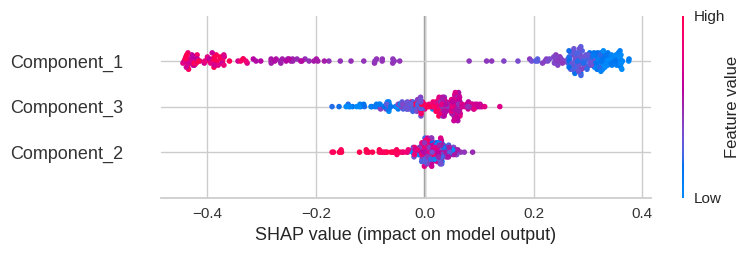

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
